In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [3]:
import keras
import tensorflow as tf
print(f"Keras version: {keras.__version__}")
print(f"TensorFlow version: {tf.__version__}")

Keras version: 3.5.0
TensorFlow version: 2.17.0


In [4]:
#download the weather images and put them in a directory
path = r'/Users/rachelgrigiac/Documents/CareerFoundry/Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [12]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [13]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [15]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 10, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 221ms/step - accuracy: 0.7749 - loss: 0.0829 - val_accuracy: 0.6620 - val_loss: 0.1291
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.6667 - loss: 0.1245 - val_accuracy: 0.6250 - val_loss: 0.1050
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 221ms/step - accuracy: 0.8037 - loss: 0.0703 - val_accuracy: 0.7222 - val_loss: 0.1038
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - accuracy: 0.7500 - loss: 0.0709 - val_accuracy: 0.5000 - val_loss: 0.1485
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 223ms/step - accuracy: 0.7706 - loss: 0.0775 - val_accuracy: 0.7130 - val_loss: 0.1190
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.8333 - loss: 0.0735 - val_accuracy: 0.7500 - val_loss: 0.1115
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 225ms/step - accuracy: 0.8324 - loss: 0.0616 - val_accuracy: 0.8657 - val_loss: 0.0610
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 1.0000 - loss: 0.0425 - val_accuracy

2024-10-11 10:48:06.834220: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [16]:
results = pd.DataFrame(model.history.history)

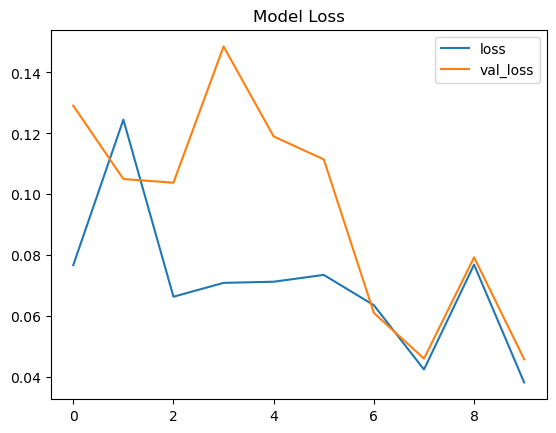

In [17]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

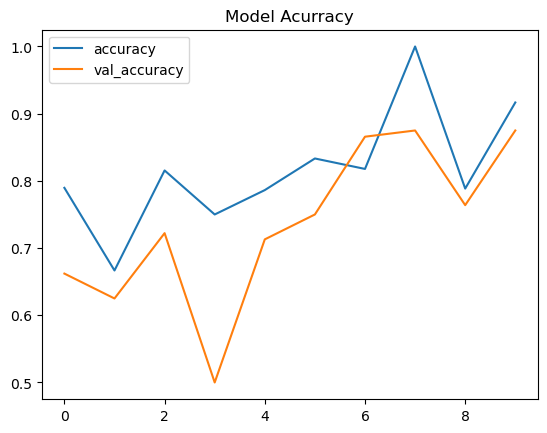

In [18]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [19]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9166666865348816, Val_Accuracy: 0.875
Loss: 0.03819006308913231, Val_Loss: 0.045812033116817474


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


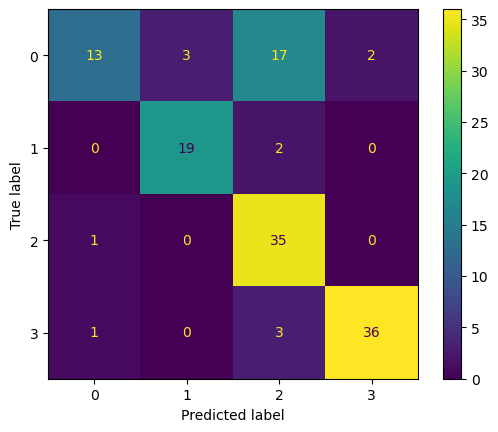

In [20]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [21]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


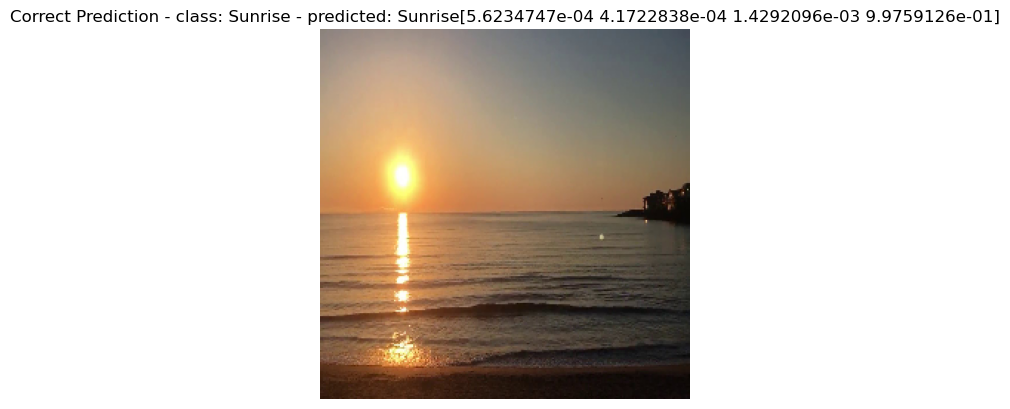

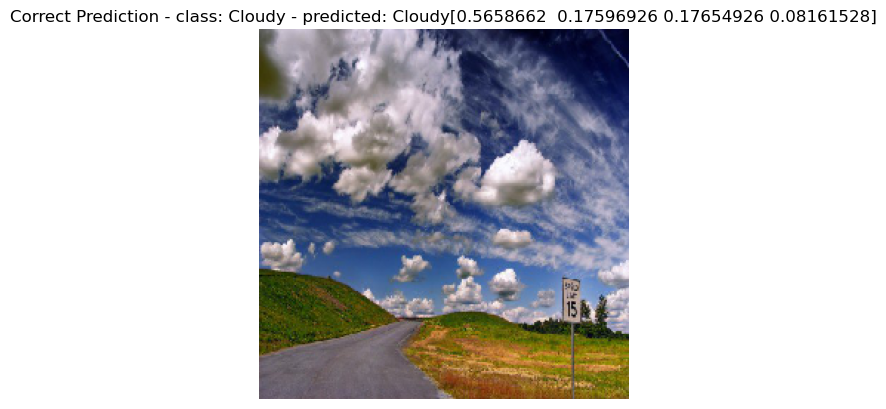

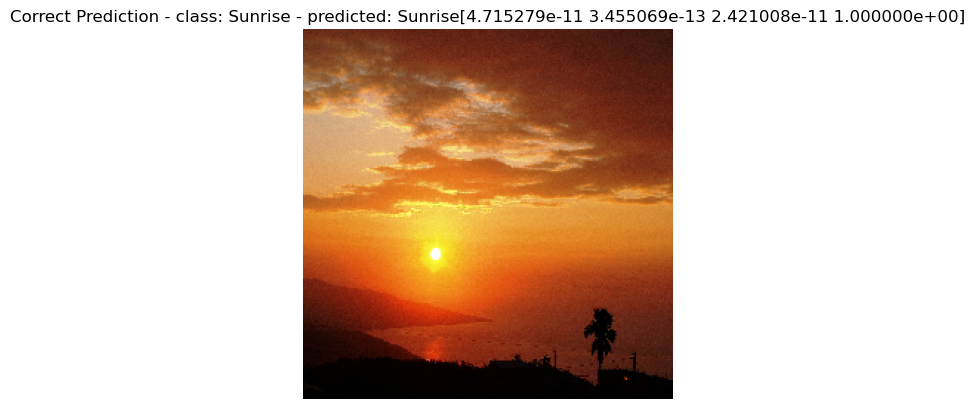

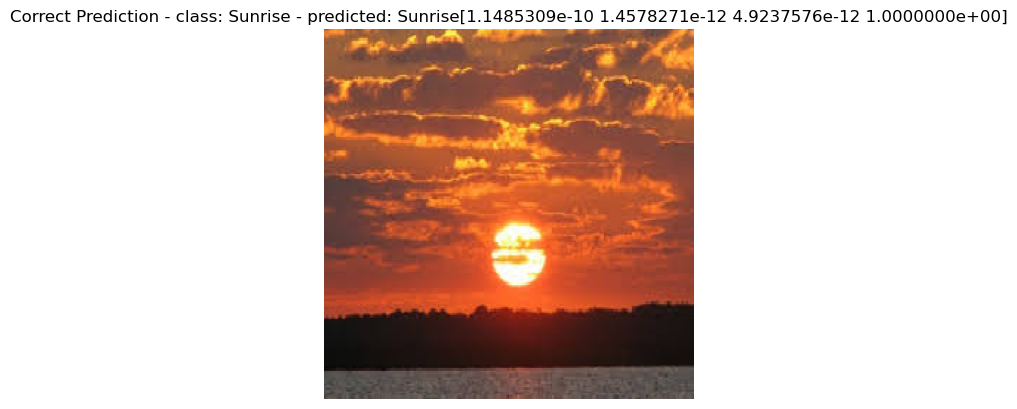

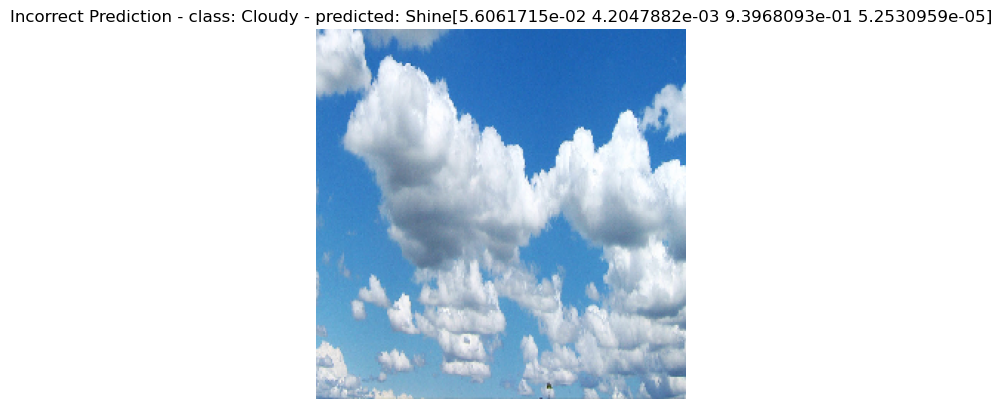

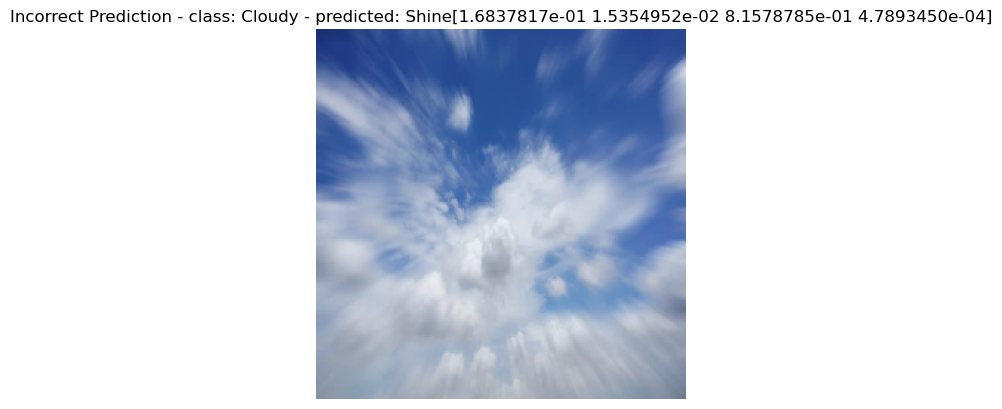

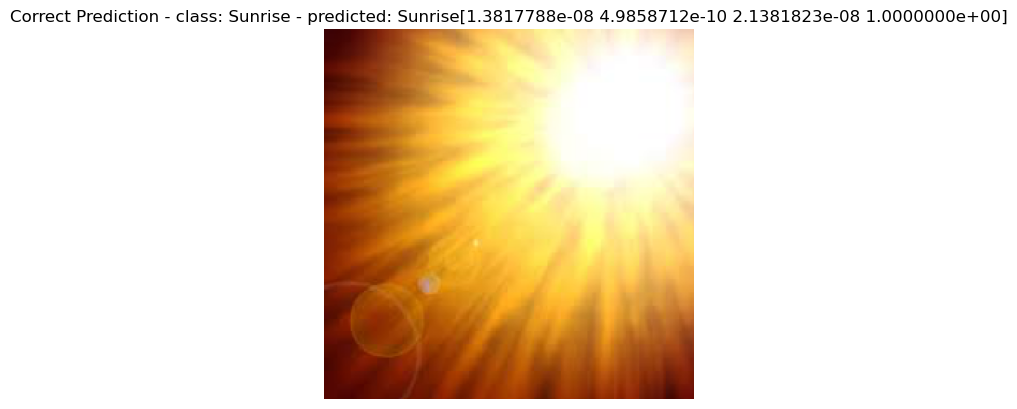

In [22]:
predict_one(model, 7) #<--you can show multiple pictures with this command. Just fill in the number you want to see.